## MNIST

In [ ]:
import pandas as pd

mnist_csv = pd.read_csv('/content/sample_data/mnist_train_small.csv', header=None, skiprows=1).values

In [ ]:
print(mnist_csv.shape)
print(mnist_csv)

(19999, 785)
[[5 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 ...
 [2 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]]


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(mnist_csv, test_size=0.3, random_state=1)

In [ ]:
from tensorflow.keras import utils

# one-hot 인코딩
Y_train, X_train = utils.to_categorical(train[:,0]), train[:,1:]
Y_test, X_test = utils.to_categorical(test[:,0]), test[:,1:]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(13999, 784) (13999, 10)
(6000, 784) (6000, 10)


In [ ]:
# 정규화 (0-255로 이루어진 데이터를 0-1로 정규화)
# min-max

X_train_norm = (X_train-0)/(255-0)
X_test_norm = (X_test-0)/(255-0)

print(Y_train[0])
print(X_train_norm[0])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0

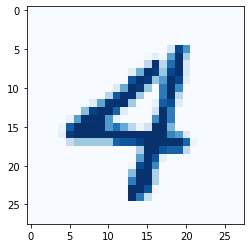

In [ ]:
# 시각화
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.reshape(X_train_norm[0], (28,28)), cmap=plt.cm.Blues)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout

print(len(X_train_norm[0]))

mlp_model = Sequential()
mlp_model.add(Dense(512, activation='relu', input_shape=(784,)))
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dropout(0.3))
mlp_model.add(Dense(128, activation='relu'))
mlp_model.add(Dense(10, activation='softmax'))
mlp_model.summary()

# 유닛수를 조절하면 학습시간, 정확도에 영향
# 너무 작으면 속도는 빨라지는데 정확도는 너무 떨어짐
# 너무 크면 속도가 느려지고 정확도는 너무 높아짐

784
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 512)               401920    
                                                                 
 dense_83 (Dense)            (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_84 (Dense)            (None, 128)               32896     
                                                                 
 dense_85 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sgd = SGD(lr=0.005)
mlp_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# verbose : 0 (출력 X) / 1 (모든 과정 출력) / 2 (epochs 끝날 때마다 출력)
# val_loss, val_accuracy : train에 대해서 학습을 하고 test에 대해서는 어떻게 나오는지
# batch : 예를 들어, 5면 데이터를 5개씩 묶어서 학습을 시켜 / 크면 클수록 모델이 빨리 학습하지만 그래픽이 많이 필요해짐(한 번에 많은 데이터를 학습해야되니까)

model_history = mlp_model.fit(X_train_norm, Y_train, epochs=15, batch_size=256, verbose=2, validation_data=(X_test_norm, Y_test), shuffle=True)

Epoch 1/15
55/55 - 1s - loss: 0.6694 - accuracy: 0.8025 - val_loss: 0.2790 - val_accuracy: 0.9162 - 824ms/epoch - 15ms/step
Epoch 2/15
55/55 - 0s - loss: 0.2376 - accuracy: 0.9294 - val_loss: 0.2032 - val_accuracy: 0.9373 - 242ms/epoch - 4ms/step
Epoch 3/15
55/55 - 0s - loss: 0.1553 - accuracy: 0.9541 - val_loss: 0.1739 - val_accuracy: 0.9467 - 238ms/epoch - 4ms/step
Epoch 4/15
55/55 - 0s - loss: 0.1085 - accuracy: 0.9674 - val_loss: 0.1574 - val_accuracy: 0.9507 - 229ms/epoch - 4ms/step
Epoch 5/15
55/55 - 0s - loss: 0.0785 - accuracy: 0.9756 - val_loss: 0.1434 - val_accuracy: 0.9557 - 243ms/epoch - 4ms/step
Epoch 6/15
55/55 - 0s - loss: 0.0605 - accuracy: 0.9829 - val_loss: 0.1389 - val_accuracy: 0.9568 - 240ms/epoch - 4ms/step
Epoch 7/15
55/55 - 0s - loss: 0.0404 - accuracy: 0.9890 - val_loss: 0.1572 - val_accuracy: 0.9535 - 236ms/epoch - 4ms/step
Epoch 8/15
55/55 - 0s - loss: 0.0340 - accuracy: 0.9909 - val_loss: 0.1442 - val_accuracy: 0.9595 - 245ms/epoch - 4ms/step
Epoch 9/15
55/5

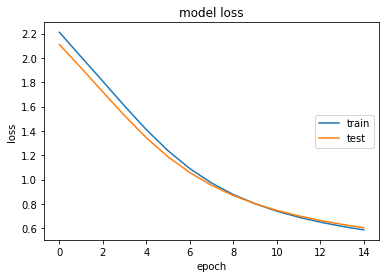

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

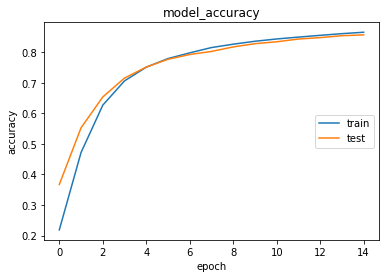

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(model_input, feature, label, class_info):
  pred=model_input.predict(feature)
  cnf_matrix = confusion_matrix(np.argmax(label, axis=1), np.argmax(pred, axis=1))
  plt.figure()
  plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
  tick_marks = np.arange(len(class_info))
  plt.xticks(tick_marks, class_info, rotation=45)
  plt.yticks(tick_marks, class_info)
  thresh = cnf_matrix.max()/2.

  for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j], horizontalalignment='center', color='white' if cnf_matrix[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
  plt.show()

188/188 [==============================] - 0s 2ms/step


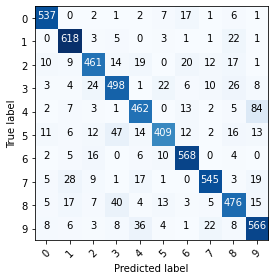

In [ ]:
label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(mlp_model, X_test_norm, Y_test, class_info=label)